## Libraries import

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt

## Introduction
This project focuses on the analysis and processing of time series data for Ethereum (ETH-USD) using data from Yahoo Finance. Ethereum is one of the leading cryptocurrencies, and its time series data provides valuable insights into its price trends, volatility, and potential future behavior. The main steps include data cleaning, exploratory data analysis (EDA), and the application of various financial and time series indicators to extract meaningful insights.

## Data Import and Preparation

The data for Ethereum (ETH-USD) is fetched from Yahoo Finance using the `yfinance` Python library. The dataset includes:

1. **Date**: This column represents the specific date of each observation in the time series. Each row corresponds to a trading day, showing the price and volume data for that day.

2. **Open Price**: The price at which Ethereum (ETH-USD) opened for trading on a given day. This is the first recorded price at the start of that trading day.

3. **High Price**: The highest price that Ethereum (ETH-USD) reached during the course of the trading day. It reflects the maximum price traders were willing to pay for Ethereum during that period.

4. **Low Price**: The lowest price that Ethereum (ETH-USD) traded at during the day. It indicates the minimum price at which traders were willing to sell Ethereum during that period.

5. **Close Price**: The final price at which Ethereum (ETH-USD) traded when the market closed for the day. This is one of the most important data points because it reflects the consensus market value at the end of the trading day.

6. **Adjusted Close Price**: The closing price that has been adjusted for corporate actions such as stock splits, dividends, or similar events. For cryptocurrencies like Ethereum, this adjusted price is typically equal to the close price, but in general, it's a more accurate reflection of the asset's value over time.

7. **Volume**: The total amount of Ethereum (ETH-USD) traded during the trading day. This is a measure of market activity and liquidity. Higher volume indicates more market participants and can suggest strong interest or momentum in either buying or selling.
   
---

In [36]:
#download data from yahoo finance
data = yf.download('ETH-USD', start="2018-01-01", end="2024-09-09")
#print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824


In [37]:
# Check for missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


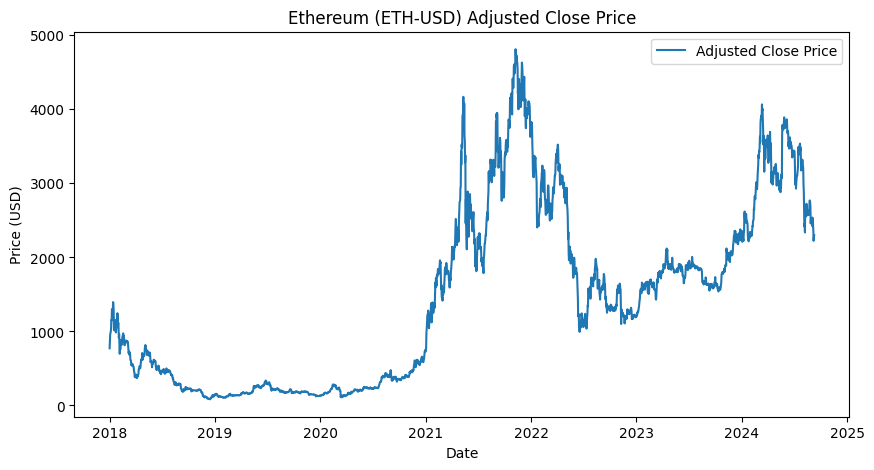

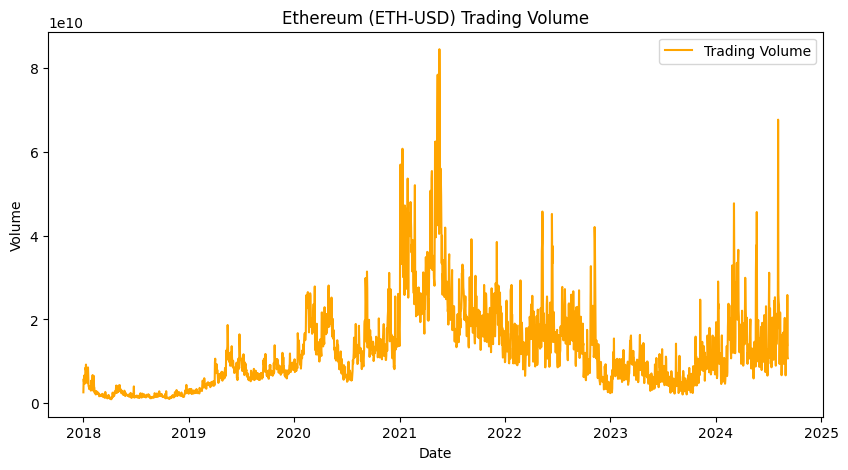

In [38]:
# Plotting Ethereum's adjusted closing price over time
plt.figure(figsize=(10,5))
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.title('Ethereum (ETH-USD) Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plotting trading volume over time
plt.figure(figsize=(10,5))
plt.plot(data['Volume'], label='Trading Volume', color='orange')
plt.title('Ethereum (ETH-USD) Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [39]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824


In [41]:
# Daily returns are calculated to analyze the day-to-day percentage change in the price of Ethereum.
data['Daily_Return'] = data['Adj Close'].pct_change()

# 20-day Simple Moving Average
data['SMA_20'] = data['Adj Close'].rolling(window=20).mean()

# 20-day Exponential Moving Average
data['EMA_20'] = data['Adj Close'].ewm(span=20, adjust=False).mean()

# 20-day rolling volatility
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

def rsi(df, window=14):
    delta = df['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# 14-day RSI
data['RSI_14'] = rsi(data)

#Showing tail because the head has NaN values due to the rolling window
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,SMA_20,EMA_20,Volatility,RSI_14
Date,,,,,,,,,,,
2024-09-04,2420.192383,2488.916504,2313.265137,2448.977051,2448.977051,16709600747,0.011722,2582.050342,2576.506237,0.030842,39.783268
2024-09-05,2448.986816,2465.385254,2348.863281,2367.737549,2367.737549,13632325040,-0.033173,2570.777893,2556.623505,0.031489,36.783866
2024-09-06,2367.700928,2406.511963,2150.863281,2223.876465,2223.876465,25825618367,-0.060759,2551.244373,2524.933311,0.033768,22.075213
2024-09-07,2223.929199,2310.194824,2222.100830,2274.107178,2274.107178,11124608320,0.022587,2534.281873,2501.045108,0.034408,25.558326
2024-09-08,2274.437744,2332.359375,2243.911377,2297.292969,2297.292969,10718443487,0.010196,2517.281201,2481.640142,0.034434,27.765767
